In [40]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For linear models with statsmodel
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

import warnings
warnings.filterwarnings('ignore')

import session_info
session_info.show(html=False)



-----
matplotlib          3.7.1
numpy               1.23.5
pandas              2.0.2
seaborn             0.12.2
session_info        1.0.0
sklearn             1.0.2
statsmodels         0.13.2
-----
IPython             8.13.2
jupyter_client      6.1.12
jupyter_core        4.9.2
jupyterlab          3.3.2
notebook            6.4.8
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.10.0-23-amd64-x86_64-with-glibc2.31
-----
Session information updated at 2023-06-15 16:40


- Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.


- Exercici 2

Compara’ls en base al MSE i al R2.


- Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.


- Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


- Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.




Enlloc de seguir l'ordre establert dels exercícis, crearem diferents seccions per a cada un dels models mostrant els passos exigits. Al final compararem el seu rendiment a través del MSE i l'R².

Primer de tot llegim el dataset i fem les modificacions necessàries. Aquest dataset ja ha estat analitzat anteriorment a: https://github.com/zonioi/IT_Academy_BA/blob/master/Sprint5/Tasca_M5_T02.ipynb

In [2]:
df = pd.read_csv('housing data.csv', names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df['CHAS'] = df['CHAS'].astype('category')
print(df.isna().value_counts())

df.head()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  MEDV 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
Name: count, dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Separem les dades en 2 dataframes, train i test. També les normalitzarem

In [3]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.1, random_state=19)


# And normalized data
trans = StandardScaler()

X_train_norm = trans.fit_transform(X_train)
array_y = np.array(y_train).reshape(-1,1)
y_train_norm = trans.fit_transform(array_y)


### La variable que volem predir (MEDV)

En els exercicis a seguir, utilitazarem elguns models de regressió per intentar predir la variable MEDV (preus dels haitatges en milers de dòlars). Observem que la variable MEDV té una mitjana de 22.53 amb una desviació estàndart (std) de 9.19. El rang de la variable és de 45.00 i el primer, segon i tercer quartils són respectivament 17.03, 21.2 i 25.00. Per tant, entre 17 i 25 tenim la majoria dels valors en la nostra base de dades.

In [4]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Per tenir una noció de si el model utilitzat és o no adequat, utilitzarem les mètriques R² i MAE (Mean Absolute Error). A partir de la mitja de la variable MEDV calcularem un error base, que sortirà de la mitja del valor absolut de la subtracció de la mitja MEDV i el valor fet servir per el test (y_test). Aquest error base ens servirà de paràmetre, comparant-lo amb els MAE de cada model. Per considerar el model, com a mínim hauria de tenir un MAE menor que l'error base calculat. 

In [5]:
# Calculem l'error base
error_base = abs(np.mean(df['MEDV']) - y_test)

print('Error Base: ', round(np.mean(error_base), 2))

Error Base:  6.6


## 1.1 Linear Regression (amb statsmodels)

Començarem utilitzant el model de regressió lineal per múltiples variables. En un primer moment, farem servir totes les columnes disponibles per entrenar el model. A seguir, farem el mateix amb les dades normalitzades per examinar si hi ha alguna diferència.

In [9]:
# Creem el model linear OLS (Ordinary Least Squares) i l'entrenem amb les dades d'entrenament.
model_lr1 = sm.OLS(y_train, X_train).fit()
print(model_lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     102.5
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          3.28e-124
Time:                        16:00:22   Log-Likelihood:                -1338.7
No. Observations:                 455   AIC:                             2705.
Df Residuals:                     441   BIC:                             2763.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0205      5.335      6.189      0.0

En el sumari de la llibreria statsmodel observem que hem obtingut un R² de 0.751. Això vol dir que el 75.1%  de la variació dels preus de les cases es pot explicar per totes les variables emprades del dataset (['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO','B','LSTAT']). Serà que amb menys variables podríem obtenir un resultat similar o millor? Això ho podrem veure mitjançant nous R-squared o el Log-Likelihood (-1338.7) en aquest cas. Quant més a prop de 0 millor.

La constant i les variables de la taula ens indiquen que per fer una previsió amb aquest model, la nostra equació seria:

33.0205 - CRIM x 0.1095 + ZN x 0.0461 + INDUS x 0.0163 + ... - LSTAT x 0.053 = MEDV

També el p-value ens dóna una idea de quant, cada una de les variables, influeix estatísticament en el preu de les vivendes. Si el p-value és menor que 0.05 indica que hi ha una relació estatísticament significant entre la variable i la predicció.

Farem les prediccions amb aquest model amb la base de dades test utilitzant eines de la llibrería statsmodel. Les compararem amb els resultats reals i en calcularem l'error MSE.


MAE_lr1 =  3.69


<IPython.core.display.Javascript object>


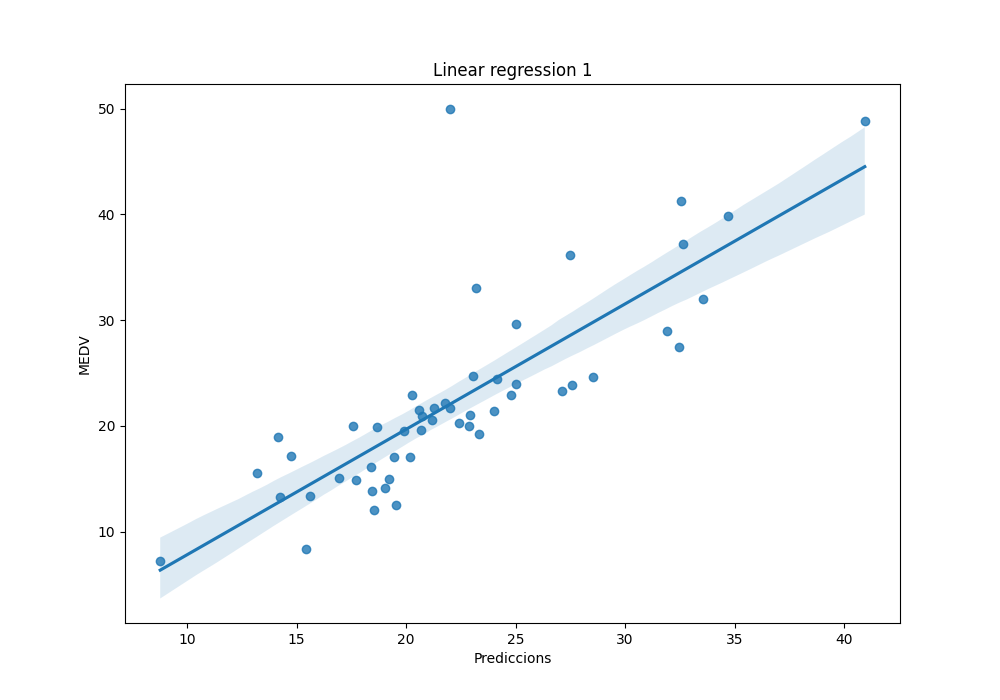

Text(0, 0.5, 'MEDV')

In [10]:
predictions_lr1 = model_lr1.predict(X_test)

def mae (prediccions, y_test):
    errors = abs(prediccions - y_test)
    # Print out the mean absolute error (mae)
    return round(np.mean(errors), 2)

print('MAE_lr1 = ', mae(predictions_lr1, y_test))

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_lr1, y=y_test)

plt.title('Linear regression 1')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

Pel gràfic també observem que un model simple dóna un resultat acceptable. El MAE per aquest primer model ha estat de 3.69, per sota de l'error base.

Si entrenem el mateix model però excluint el número d'habitacions, com exigit en els exercicis, observem que l'R² cau del 0.751 al 0.698 i el MAE augmenta lleugerament. Aquesta és la variable amb més impacte sobre el resultat final.

In [15]:
# Excluim el número d'habitacions en X

X_red = df.drop(['MEDV','RM'], axis=1)
y = df['MEDV']
X_red = sm.add_constant(X_red)
X_train_red, X_test_red, y_train, y_test = train_test_split(
X_red,y, test_size=0.1, random_state=19)

model_lr2 = sm.OLS(y_train, X_train_red).fit()
print(model_lr2.summary())

#Prediccions
predictions_lr2 = model_lr2.predict(X_test_red)

print('MAE_lr2 = ', mae(predictions_lr2, y_test))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     85.14
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          9.26e-107
Time:                        14:41:57   Log-Likelihood:                -1382.9
No. Observations:                 455   AIC:                             2792.
Df Residuals:                     442   BIC:                             2845.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.2683      4.087     17.191      0.0

### 1.1 Linear regression with Scikit Learn

Només per comprovar que el mètode de Scikit Learn  obtenim el mateix resultats que amb l'anterior utilitzant les dades del model lr_1. La variable intercept és la que trobem com a const en el statsmodel i la llista slope és el coeficient de variació per cada una de les variables, també descrita al sumari de l'ststsmodel.

In [17]:
model = LinearRegression().fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

#intercept

print(f"intercept: {model.intercept_}")

#slope

print(f"slope: {model.coef_}")
print('')
y_pred = model.predict(X_test)
print('MAE_lr2 = ', mae(y_pred, y_test))

coefficient of determination: 0.7513401576567228
intercept: 33.02050275310649
slope: [ 0.00000000e+00 -1.09451175e-01  4.60884862e-02  1.63066797e-02
  3.19205079e+00 -1.78110627e+01  4.24634595e+00 -1.25497262e-02
 -1.51868035e+00  2.78548564e-01 -1.10615220e-02 -9.36894090e-01
  9.77165714e-03 -4.38806405e-01]

MAE_lr2 =  3.69


## Random Forest

Anem a explorar un model utilitzant Random Forest. Importarem les llibreríes necessàries i, per començar utilitzarem 100 estimadors.

MAE_rf1 =  2.56
R2_rf1 =  0.7305301257170995


<IPython.core.display.Javascript object>


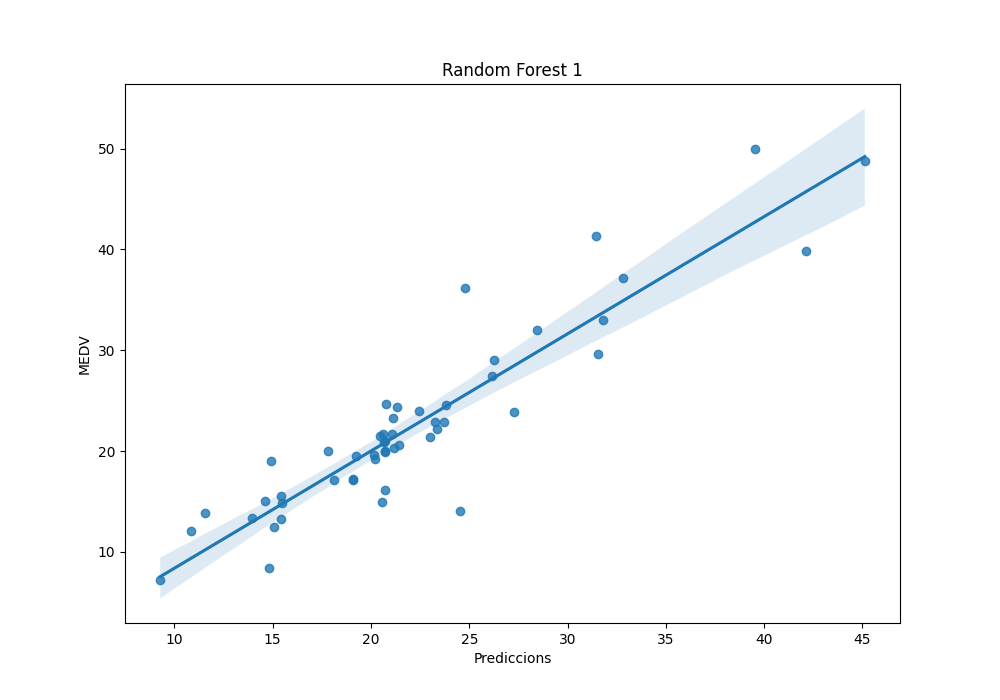

Text(0, 0.5, 'MEDV')

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Definim el model i l'entrenem amb les dades train

model_rf1 = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(X_train, y_train)

predictions_rf1 = model_rf1.predict(X_test)

print('MAE_rf1 = ', mae(predictions_rf1, y_test))

print('R2_rf1 = ', r2_score(predictions_rf1, y_test))

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_rf1, y=y_test)

plt.title('Random Forest 1')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')


Amb el model Random Forest, obtenim un R² de 0.73 i MAE de 2.56. 

El Random Forest ofereix un conjunt de paràmetres que es poden modificar per fer millores en els models. Utilitzarem el GridSearchCV per tal d'experimentar amb alguns d'aquests paràmetres. També, dins del GRIDSearchCV hi ha l'opció CV que implementa un cross validation que evitaràn un *overfitting* en el resultat final.

In [26]:
RandomForestRegressor?

In [28]:
param_grid_rf = {'n_estimators': [100, 1000, 2000],  
                 'max_depth': [10, 100, None], 
                 'max_features': ['sqrt','log2', 'auto']}  

grid = GridSearchCV(
    estimator=model_rf1,
    param_grid=param_grid_rf,
    cv=10,
    n_jobs=5,
    verbose=1
)

#Entrenem el model amb el grid

grid.fit(X_train, y_train)

# imprimim els millors parametres fem les prediccions i obtenim R2 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 


print('MAE_grid = ', mae(grid_predictions, y_test))
print('R2 = ', r2_score(grid_predictions, y_test))

Fitting 10 folds for each of 27 candidates, totalling 270 fits
{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 1000}
MAE_grid =  2.43
R2 =  0.720106745535158


Hem experimentat amb el n_estimators, max_depth i max_features obtenint un R2 = 0.72 i un MAE = 2.43.

<IPython.core.display.Javascript object>


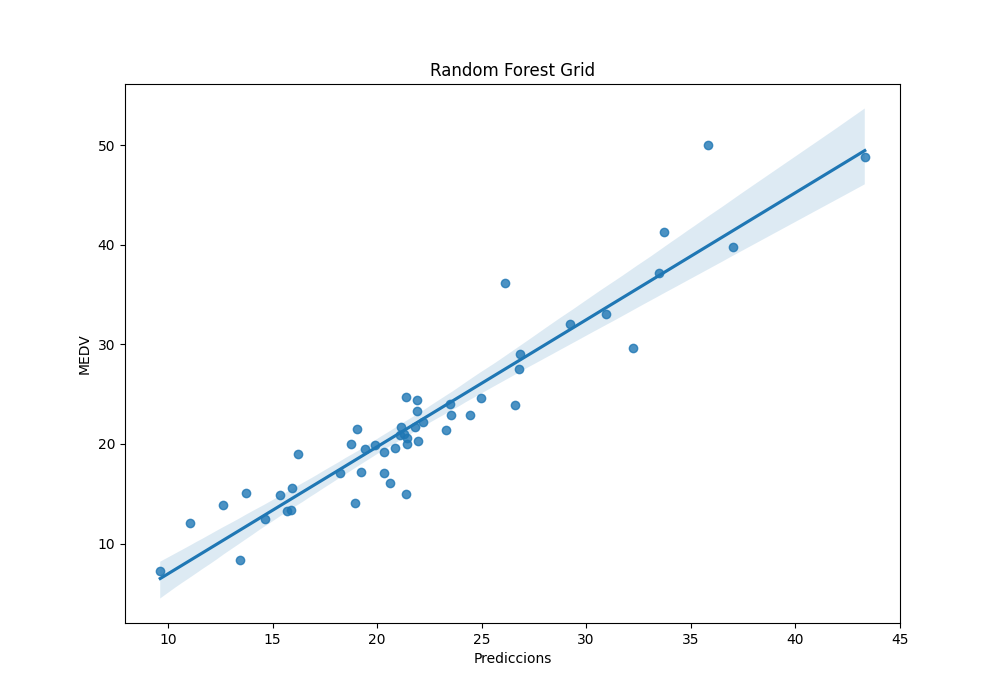

Text(0, 0.5, 'MEDV')

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=grid_predictions, y=y_test)

plt.title('Random Forest Grid')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

### Decision Tree

Experimentem ara Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model_reg1 = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

predictions_reg1 = model_reg1.predict(X_test)

print('MAE_reg1 = ', mae(predictions_reg1, y_test))
print('R2 = ', r2_score(predictions_reg1, y_test))

MAE_reg1 =  3.49
R2 =  0.505100261470947


El decision tree ens dóna resultats una mica pitjors que amb els models utilitzats anteriorment. A seguir mostrem les representacions gràfiques de l'arbre de decisió. En el primer, veiem la complexitat del model, el segón hem truncat per una millor visualització. Implementarem el GridSearchCV per tal d'intentar millorar els resultats.

<IPython.core.display.Javascript object>


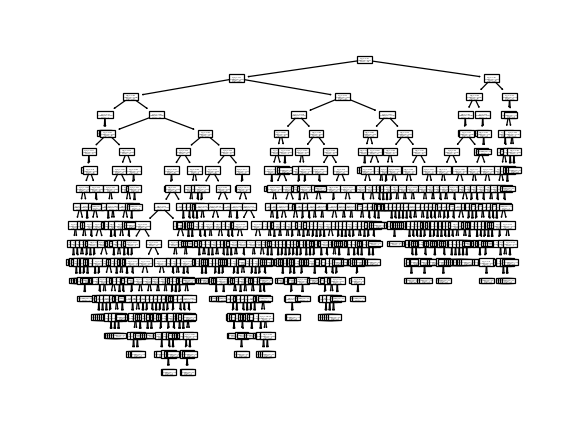

In [29]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots()
plot_tree(model_reg1)
plt.show()

<IPython.core.display.Javascript object>


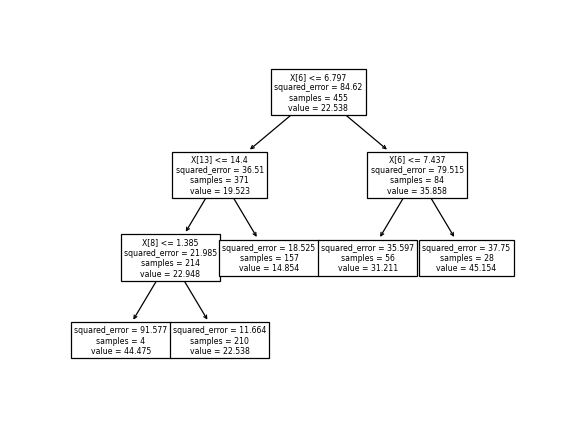

In [30]:
model_reg1 = DecisionTreeRegressor(max_leaf_nodes=5,random_state=0).fit(X_train,y_train)

fig, ax = plt.subplots()
plot_tree(model_reg1)
plt.show()

In [37]:
param_grid_reg = {'criterion': ["squared_error", "friedman_mse", "absolute_error"],  
              'splitter': ["best", "random"], 
              'min_samples_leaf':[1, 10, 100],
              'max_features': ['auto','sqrt','log2'],
              'random_state': [0,1,2]}  

grid = GridSearchCV(
    estimator=model_reg1,
    param_grid=param_grid_reg,
    cv=10,
    n_jobs=5,
    verbose=1
)

#Entrenem el model amb el grid

grid.fit(X_train, y_train)

# imprimim els millors parametres fem les prediccions i obtenim R2 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 


print('MAE_grid = ', mae(grid_predictions, y_test))
print('R2 = ', r2_score(grid_predictions, y_test))

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
{'criterion': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 1, 'random_state': 2, 'splitter': 'best'}
MAE_grid =  3.14
R2 =  0.7231693778703492


Observem millors resultats un cop implementat el GridSearchCV

### Conclusions

Hem utilitzat diferents models de regressió per tal d'intentar preveure el preu dels habitatges al dataset housing. Hem explorat els model multilinears els quals ens han donat resultats acceptables però amb problemes de multicolinearitat. 

Després hem experimentat els models Random Forest i DecisionTree i els hem millorat experimentant amb alguns dels paramatres mithançant GridSearchCV. A seguir els resultats obtinguts:

| Model        | R2        | MAE        |
|--------------|-----------|------------|
| Linear Regression | 0.75 | 3.69  |
| Linear Regression 2* | 0.69 | 3.79  |
| Random Forest     | 0.72 | 2.43  |
| Decision Tree     | 0.72 | 3.14  |


\* Igual que linear regression excluint la variable número de habitacions.

Val a dir que aquest ha estat un exercíci per conèixer els diferents mètodes i no han estat explorats en profunditat per intentar millorar el resultat. De totes maneres, els resultats predictius han estat bastant bons per una primera aproximació de cada un dels models. 

En tots els casos s'han dividit les dades en train i test per tal de poder fer els gràfics comparatius. Això en general evita un *overfitting*. Però com rqueria un dels exercicis, anem a entrenar un dels models amb totes les dades per veure si hi ha una millora. 

En el cas del model linear regression amb totes les dades, no millora l'anterior, tot i que els resultats són semblants:

In [37]:
model_lr3 = sm.OLS(y, X).fit()
print(model_lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        16:39:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Ja amb el model de Decision Tree ens dona un problema clar d'overfitting. El model és excelent per les dades d'entrenament però no per dades noves.

In [38]:
model_reg3 = DecisionTreeRegressor(random_state=0, splitter='random').fit(X,y)

predictions_reg3 = model_reg3.predict(X)

print('MAE_reg3 = ', mae(predictions_reg3, y))

MAE_reg3 =  0.0


<IPython.core.display.Javascript object>


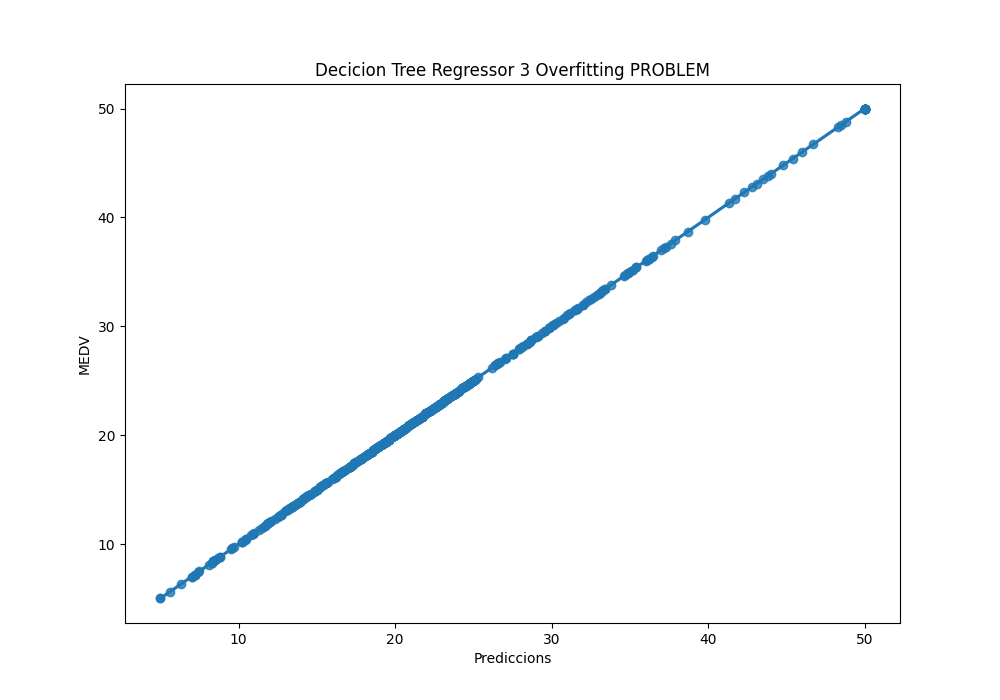

Text(0, 0.5, 'MEDV')

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_reg3, y=y)

plt.title('Decicion Tree Regressor 3 Overfitting PROBLEM')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')